# Parameter sweep of mutation effect size

This notebook explore how the effect size of new mutations steer the evolutionary process. Mutations are modeled as a Brownian motion of the model parameters: two microscopic association constants k1 and k2, and a cooperativity factor f. Effect size is scaled by changing the Brownian motion model parameter dt

The takeaway is that variance grows in the population as the dt parameter grows. For every log unit in dt, the population variance increases about 2 log units, and with similar temporal dynamics

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
%matplotlib inline

#### For each generation, the following stats are logged: mean and variance of population fitness; variance of model parameters; and number of unique parameters in population. Evolution was run on a population size of 1000 for 1000 generations

#### dt = .01

In [2]:
dt1 = pd.read_csv("../ParamSweeps/dt/dtSweep_0.1_0.csv",index_col=0)
dt1.head()

,w_bar,w_var,k1_var,k2_var,f_var,numk1,numk2,numf
gen,,,,,,,,
0,0.999168,3.917852e-07,0.040612,0.043138,0.039685,646,646,646
1,0.998801,8.015793e-07,0.085150,0.086154,0.081764,641,641,641
2,0.998596,1.173107e-06,0.121617,0.126191,0.114071,629,629,629
3,0.998373,1.606347e-06,0.161914,0.163820,0.154751,643,643,643
4,0.998232,1.838798e-06,0.219454,0.214999,0.180080,616,616,616


#### The parameters steadily increase in variance at the beginning

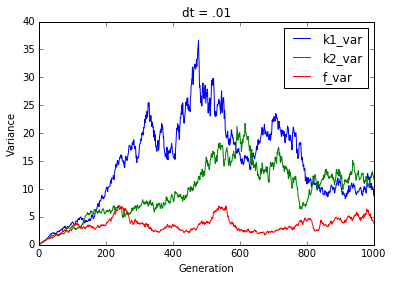

In [3]:
dt1[["k1_var","k2_var","f_var"]].plot()
plt.ylabel("Variance")
plt.xlabel("Generation")
plt.title("dt = .01")

#### The population mean fitness stays very close to 1, and the fitness variance near 0

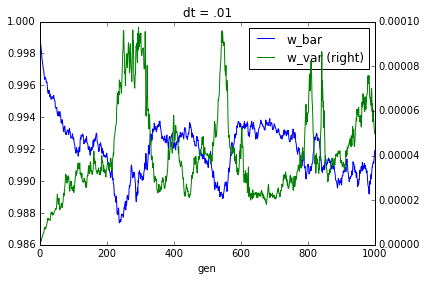

In [4]:
ax = dt1[["w_bar"]].plot()
dt1[["w_var"]].plot(ax=ax,secondary_y=True)

plt.title("dt = .01")
plt.xlabel("Generations")

#### The number of unique parameter values stay close to 635 (out of 1000) the whole time. That's surprising

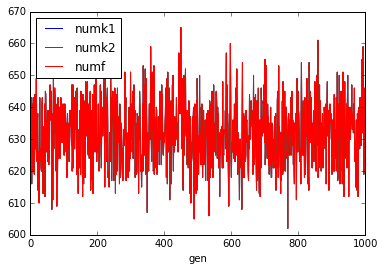

In [5]:
dt1[["numk1","numk2","numf"]].plot()

#### dt = 1000

In [6]:
dt2 = pd.read_csv("../ParamSweeps/dt/dtSweep_1000_0.csv")
dt2.head()

,gen,w_bar,w_var,k1_var,k2_var,f_var,numk1,numk2,numf
0,0,0.711474,0.005468,4.231979e+06,3.761147e+06,1.231239e+06,614,614,335
1,1,0.717239,0.005053,8.340721e+06,7.815218e+06,2.591445e+06,631,631,408
2,2,0.716481,0.004450,1.237445e+07,1.044886e+07,3.781548e+06,621,621,428
3,3,0.714988,0.003596,1.626782e+07,1.486958e+07,4.356632e+06,642,642,460
4,4,0.718540,0.003654,1.987717e+07,2.044011e+07,6.090693e+06,618,618,474


#### Qualitatively similar dynamics to when dt = .01

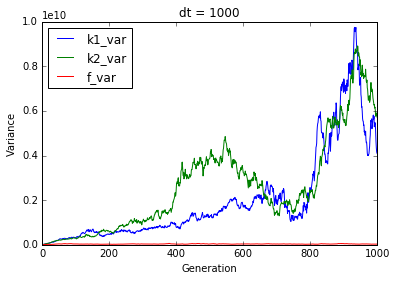

In [7]:
dt2[["k1_var","k2_var","f_var"]].plot()
plt.ylabel("Variance")
plt.xlabel("Generation")
plt.title("dt = 1000")

#### Fitness mean and variance also stay steady, though the mean fitness is quite a bit lower than when dt = .01 and variance a bit higher

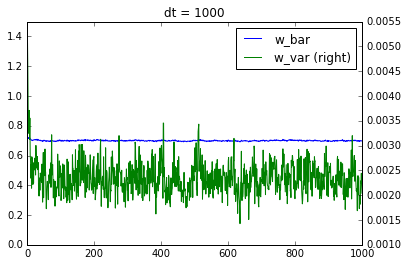

In [8]:
ax = dt2[["w_bar"]].plot(ylim=(0,1.5))
dt2[["w_var"]].plot(ax=ax,secondary_y=True)

plt.title("dt = 1000")
plt.xlabel("Generations")

#### Numer of unique params is similar for k1 and k2, but lower for f. Don't know what to make of that

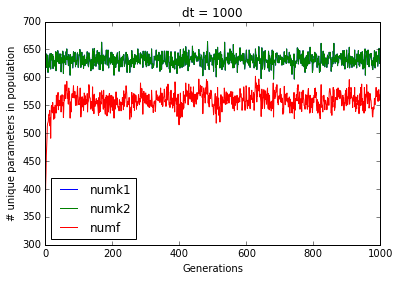

In [9]:
dt2[["numk1","numk2","numf"]].plot()
plt.title("dt = 1000")
plt.ylabel("# unique parameters in population")
plt.xlabel("Generations")

### Now we'll plot all the variances for the different dts on one plot

In [73]:
def plot_vars(infile_list,paramName,log=True):
    
    ax = plt.plot()

    styleD1 = {"0.1":"b--","1":"r--","10":"g--","100":"k--","1000":"m--"}
    styleD2 = {"0.1":"blue","1":"red","10":"green","100":"black","1000":"magenta"}

    for f in infile_list:
        df = pd.read_csv(f)
        df[paramName].plot(style=styleD1[f.split("_")[1]],label=paramName.split("_")[0])

    if log:
        plt.yscale("log")
    plt.ylabel("%s variance" % paramName.split("_")[0])
    plt.xlabel("Generation")
    
    legend_proxies = []
    dts = styleD2.keys()
    dts.sort(key=float)
    dts.reverse()
    
    for dt in dts:
        prox = mlines.Line2D([], [], color=styleD2[dt], label=dt, linewidth=3)
        legend_proxies.append(prox)

    plt.legend(handles=legend_proxies,bbox_to_anchor=(1.25,1),title="dt")

#### They are on very different scales (we'll do a log y below)

In [74]:
tmp = !ls ../ParamSweeps/dt/*.csv
files = list((tmp))

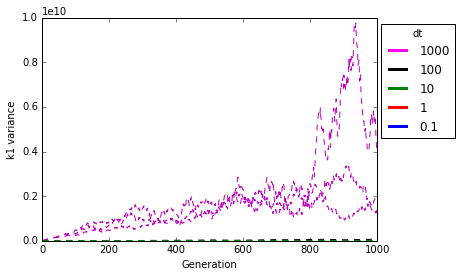

In [75]:
plot_vars(files,"k1_var",log=False)

#### This is cool. For every log unit change in the dt parameter, the variance growth in the popluation scales up 2 log units.

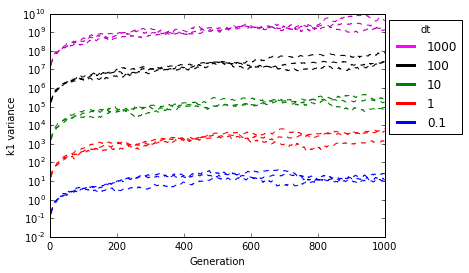

In [76]:
plot_vars(files,"k1_var",log=True)

#### The same is true for the k2 parameter. Both k1 and k2 variance seem to grow without bound.

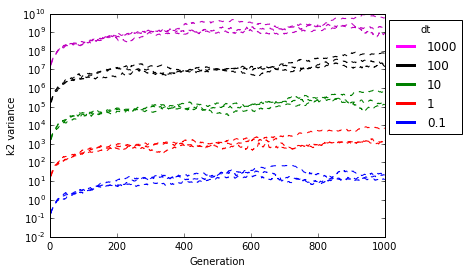

In [77]:
plot_vars(files,"k2_var",log=True)

#### The f parameter does seem to have bound, though with similar scaling.

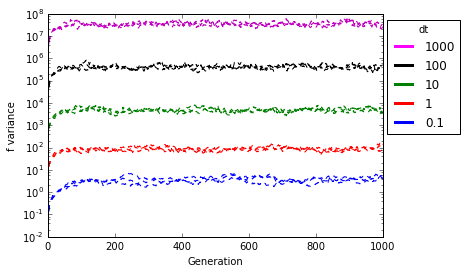

In [78]:
plot_vars(files,"f_var",log=True)